In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv
from analysis import *

# Does the Caida Graph evolves over time?

In [2]:
ripple_graph_base, caida_graph_base, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20190301.as-rel2.txt')
ripple_graph_1, caida_graph_1, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20190201.as-rel2.txt')
ripple_graph_2, caida_graph_2, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20190101.as-rel2.txt')
ripple_graph_3, caida_graph_3, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20181201.as-rel2.txt')
ripple_graph_4, caida_graph_4, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20181101.as-rel2.txt')
ripple_graph_5, caida_graph_5, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20181001.as-rel2.txt')
ripple_graph_6, caida_graph_6, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20180901.as-rel2.txt')
ripple_graph_7, caida_graph_7, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20180801.as-rel2.txt')
ripple_graph_8, caida_graph_8, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20180701.as-rel2.txt')
ripple_graph_9, caida_graph_9, _ = build_graphs('Ripple/gateway_links.csv', 'Caida/20180601.as-rel2.txt')

graphs = [ripple_graph_1, ripple_graph_2,ripple_graph_3, ripple_graph_4,ripple_graph_5, ripple_graph_6,ripple_graph_7, ripple_graph_8,ripple_graph_9]

/Users/yoanmartin/Google Drive/EPFL/Master II/Semester Project/student_19_ripple-partition/analysis.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  links['link'] = list(zip(links['provider_peer'], links['customer_peer']))


In [3]:
nodes = []
edges = []
for g in graphs:
    diff_nodes = set(ripple_graph_base.nodes) - set(g.nodes)
    nodes.append(len(diff_nodes)*100/len(ripple_graph_base.nodes))
    
    diff_edges = set(ripple_graph_base.edges) - set(g.edges)
    edges.append(len(diff_edges)*100/len(ripple_graph_base.edges))

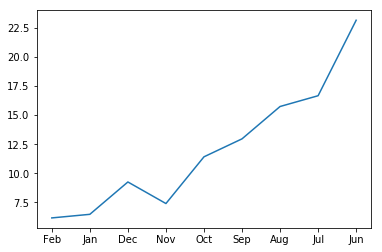

In [4]:
plt.plot(['Feb', 'Jan', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun'], nodes)

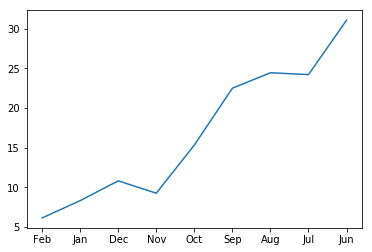

In [5]:
plt.plot(['Feb', 'Jan', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun'], edges)

# Does the results evolves over time?

In [2]:
transactions = get_transactions('Ripple/transactions_processed.csv')

## AS down

In [ ]:
result_base = generate_remove_analysis(ripple_graph_base,transactions)
result_9 = generate_remove_analysis(ripple_graph_9,transactions)

In [ ]:
plt.subplot(1,2,1)
result_base['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(1,2,2)
result_base['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()

In [ ]:
plt.subplot(1,2,1)
result_9['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(1,2,2)
result_9['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()

## Hijack

In [ ]:
result_base = generate_hijack_analysis(ripple_graph_base,transactions)
result_9 = generate_hijack_analysis(ripple_graph_9,transactions)

In [ ]:
plt.subplot(1,2,1)
result_base['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(1,2,2)
result_base['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()

In [ ]:
plt.subplot(1,2,1)
result_9['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(1,2,2)
result_9['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()

# Does the results differ if we take a subset of transactions?

In [9]:
mask_spring = (transactions['date'] == '2017-01') | (transactions['date'] == '2017-02') | (transactions['date'] == '2017-03') 
mask_summer = (transactions['date'] == '2017-04') | (transactions['date'] == '2017-05') | (transactions['date'] == '2017-06')
mask_autumn = (transactions['date'] == '2017-07') | (transactions['date'] == '2017-08') | (transactions['date'] == '2017-09') 
mask_winter = (transactions['date'] == '2017-10') | (transactions['date'] == '2017-11') | (transactions['date'] == '2017-12') 

spring_transactions = transactions[mask_spring]
summer_transactions = transactions[mask_summer]
autumn_transactions = transactions[mask_autumn]
winter_transactions = transactions[mask_winter]

## AS down

In [ ]:
result_spring = generate_remove_analysis(ripple_graph_base,spring_transactions)
result_summer = generate_remove_analysis(ripple_graph_base,summer_transactions)
result_autumn = generate_remove_analysis(ripple_graph_base,autumn_transactions)
result_winter = generate_remove_analysis(ripple_graph_base,winter_transactions)

In [ ]:
plt.subplot(2,2,1)
result_spring['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(2,2,2)
result_summer['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(2,2,3)
result_autumn['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(2,2,4)
result_winter['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()

## Hijack

In [ ]:
result_spring = generate_hijack_analysis(ripple_graph_base,spring_transactions)
result_summer = generate_hijack_analysis(ripple_graph_base,summer_transactions)
result_autumn = generate_hijack_analysis(ripple_graph_base,autumn_transactions)
result_winter = generate_hijack_analysis(ripple_graph_base,winter_transactions)

In [ ]:
plt.subplot(2,2,1)
result_spring['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(2,2,2)
result_summer['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(2,2,3)
result_autumn['amount_rerouted'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()
plt.subplot(2,2,4)
result_winter['amount_lost'].apply(lambda x: x*100/transactions['amount'].sum()).sort_values(ascending=False).head(100).to_frame().plot.bar()